In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import parse_trajectory

In [7]:
file_path = "../test/traj.out"
traj_df = parse_trajectory(file_path)

In [5]:
traj_df.head()

,timestep,id,type,x,y,z,vx,vy,vz
0,0,1.0,1.0,-0.002536,0.008971,-0.002376,-0.005160,0.018256,-0.004834
1,0,2.0,1.0,0.002734,2.701332,2.696195,0.005566,0.017968,0.007523
2,0,3.0,1.0,2.697624,0.008130,2.691477,0.010423,0.016544,-0.002075
3,0,4.0,1.0,2.700111,2.684979,0.003158,0.015486,-0.015303,0.006418
4,0,5.0,1.0,-0.008326,0.001391,5.391498,-0.016942,0.002834,0.013212


Momentum changes between timesteps:
                     vx            vy            vz
timestep                                          
100      -9.436896e-16 -7.910339e-16  1.804112e-16
200       1.609823e-15  4.163336e-16 -6.938894e-17
300      -1.026956e-15 -1.443290e-15 -5.828671e-16
400       3.677614e-16  1.471046e-15 -1.179612e-15
500      -5.342948e-16  2.081668e-16  1.235123e-15
...                ...           ...           ...
9500     -4.440892e-16  1.540434e-15 -2.775558e-16
9600      1.942890e-15 -1.935951e-15 -2.609024e-15
9700     -1.665335e-16  1.228184e-15  8.743006e-16
9800     -1.096345e-15 -1.651457e-15  3.039236e-15
9900      2.067790e-15  1.249001e-15 -1.429412e-15

[99 rows x 3 columns]
Angular Momentum changes between timesteps:
                 Lx        Ly         Lz
timestep                               
100      -3.705898 -1.980173   1.893609
200       0.661057 -2.123624  10.776467
300      -2.609398 -0.209050  -0.420384
400       5.031668 -1.669879  -2

/tmp/ipykernel_19282/3529118956.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_angular_momentum = grouped.apply(angular_momentum)


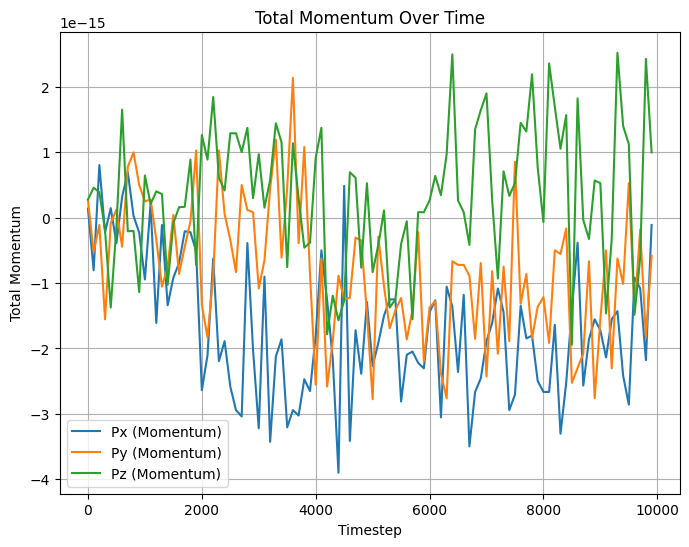

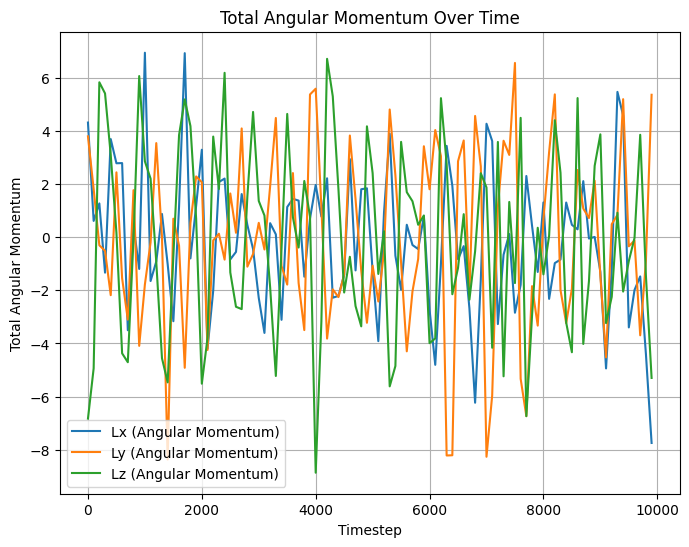

Momentum is conserved.
Angular Momentum is not conserved.


In [8]:
# Assign a uniform mass to all particles (you can replace this if masses differ)
particle_mass = 1.0  # Assuming all particles have a mass of 1 unit


# Step 1: Calculate total momentum at each timestep
def calculate_total_momentum(df):
    grouped = df.groupby("timestep")
    total_momentum = grouped[["vx", "vy", "vz"]].apply(
        lambda g: (g * particle_mass).sum()
    )
    return total_momentum


# Step 2: Calculate total angular momentum at each timestep
def calculate_total_angular_momentum(df):
    def angular_momentum(group):
        positions = group[["x", "y", "z"]].values
        velocities = group[["vx", "vy", "vz"]].values
        angular_momentum = np.cross(positions, velocities * particle_mass)
        return angular_momentum.sum(axis=0)

    grouped = df.groupby("timestep")
    total_angular_momentum = grouped.apply(angular_momentum)
    return pd.DataFrame(
        total_angular_momentum.tolist(),
        index=total_angular_momentum.index,
        columns=["Lx", "Ly", "Lz"],
    )


# Step 3: Analyze and verify conservation
# Total Momentum
total_momentum = calculate_total_momentum(traj_df)
momentum_change = total_momentum.diff().dropna()
print("Momentum changes between timesteps:\n", momentum_change)

# Total Angular Momentum
total_angular_momentum = calculate_total_angular_momentum(traj_df)
angular_momentum_change = total_angular_momentum.diff().dropna()
print("Angular Momentum changes between timesteps:\n", angular_momentum_change)

# Step 4: Plot results to visualize conservation
# Plot Momentum
plt.figure(figsize=(8, 6))
plt.plot(total_momentum.index, total_momentum["vx"], label="Px (Momentum)")
plt.plot(total_momentum.index, total_momentum["vy"], label="Py (Momentum)")
plt.plot(total_momentum.index, total_momentum["vz"], label="Pz (Momentum)")
plt.xlabel("Timestep")
plt.ylabel("Total Momentum")
plt.title("Total Momentum Over Time")
plt.legend()
plt.grid()
plt.savefig("Total_Momentum.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot Angular Momentum
plt.figure(figsize=(8, 6))
plt.plot(
    total_angular_momentum.index,
    total_angular_momentum["Lx"],
    label="Lx (Angular Momentum)",
)
plt.plot(
    total_angular_momentum.index,
    total_angular_momentum["Ly"],
    label="Ly (Angular Momentum)",
)
plt.plot(
    total_angular_momentum.index,
    total_angular_momentum["Lz"],
    label="Lz (Angular Momentum)",
)
plt.xlabel("Timestep")
plt.ylabel("Total Angular Momentum")
plt.title("Total Angular Momentum Over Time")
plt.legend()
plt.grid()
plt.savefig("Total_Angular_Momentum.png", dpi=300, bbox_inches="tight")
plt.show()

# Conservation Check
momentum_conserved = (
    momentum_change.abs().max().max() < 1e-5
)  # Tolerance for numerical errors
angular_momentum_conserved = angular_momentum_change.abs().max().max() < 1e-5

if momentum_conserved:
    print("Momentum is conserved.")
else:
    print("Momentum is not conserved.")

if angular_momentum_conserved:
    print("Angular Momentum is conserved.")
else:
    print("Angular Momentum is not conserved.")